<a href="https://colab.research.google.com/github/bifacehere/Chessboard-Analysis-AI-Computer-Vision/blob/main/Chessboardanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving File3.png to File3 (1).png


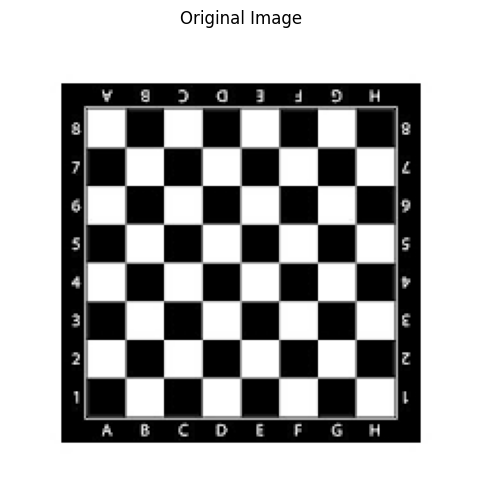

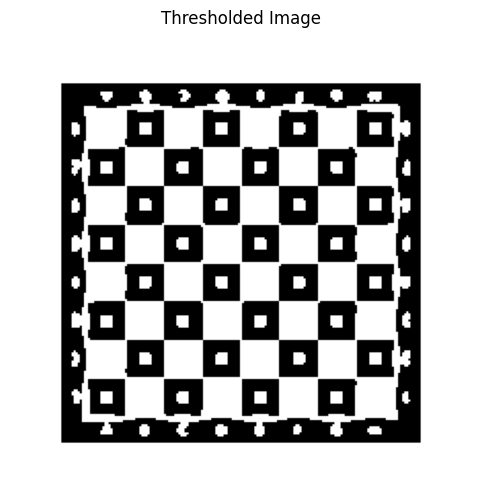

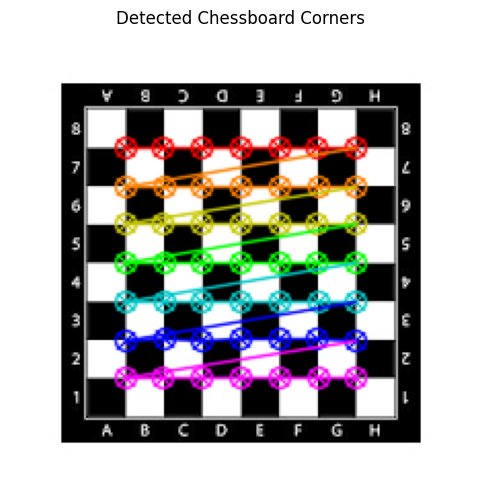

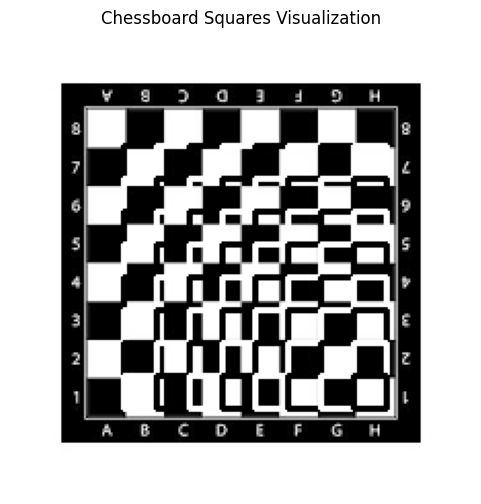


✅ Chessboard Square Count:
Black Squares: 32
White Squares: 32


In [ ]:
# Chessboard Analysis - AI Computer Vision Assignment

# =======================================
# 📌 STEP 1: Import Required Libraries
# =======================================

# OpenCV (cv2): for image processing
# NumPy: for numerical operations
# Matplotlib: for displaying images in Google Colab

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# =======================================
# 📌 STEP 2: Upload Image
# =======================================

# This block allows user to upload image(s) manually to the Colab session
uploaded = files.upload()

# Load the uploaded image
# Assumes the first uploaded file is used
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

# Display original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# =======================================
# 📌 STEP 3: Preprocessing
# =======================================

# Convert to grayscale for easier processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use adaptive thresholding to handle variable lighting
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 11, 3)

plt.figure(figsize=(6, 6))
plt.title("Thresholded Image")
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

# =======================================
# 📌 STEP 4: Detect Chessboard Corners
# =======================================

# Try to detect a full chessboard (8x8)
pattern_size = (7, 7)
ret, corners = cv2.findChessboardCorners(gray, pattern_size)

if ret:
    # Draw the corners
    chessboard_image = image.copy()
    cv2.drawChessboardCorners(chessboard_image, pattern_size, corners, ret)
    plt.figure(figsize=(6, 6))
    plt.title("Detected Chessboard Corners")
    plt.imshow(cv2.cvtColor(chessboard_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("⚠️ Could not detect chessboard corners. Try using a clearer image.")

# =======================================
# 📌 STEP 5: Count Black and White Squares Using Grid
# =======================================

# If corners found, proceed to estimation
if ret:
    black_count = 0
    white_count = 0
    board_image = image.copy()

    # Define size of grid cells based on bounding box
    x, y, w, h = cv2.boundingRect(corners)
    cell_width = w // 7
    cell_height = h // 7

    for row in range(8):
        for col in range(8):
            x0 = x + col * cell_width
            y0 = y + row * cell_height
            roi = gray[y0:y0+cell_height, x0:x0+cell_width]

            # Calculate average brightness
            avg_brightness = np.mean(roi)

            # Determine if white or black based on index
            if (row + col) % 2 == 0:
                color = (0, 0, 0)  # black square
                black_count += 1
            else:
                color = (255, 255, 255)  # white square
                white_count += 1

            # Mark square on image
            cv2.rectangle(board_image, (x0, y0), (x0+cell_width, y0+cell_height), color, 2)

    # Show result
    plt.figure(figsize=(6, 6))
    plt.title("Chessboard Squares Visualization")
    plt.imshow(cv2.cvtColor(board_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print("\n✅ Chessboard Square Count:")
    print(f"Black Squares: {black_count}")
    print(f"White Squares: {white_count}")
else:
    print("Chessboard analysis could not be performed due to detection failure.")